# Exercício 8
Edgar Kenji Tanaka - RA 023577

# Visualizando os dados
Para visualizar os dados, aplicamos o PCA nos dados reduzindo para 2 dimensões. Os dados foram estandarizados antes de aplicar o PCA. A variância dos dados após o PCA foi de 91%. 

Quando plotamos os pontos de dados, é possível notar facilmente 4 outliers. No entanto, os outros 3 outliers não são muito óbvios de se visualizar. É possível também notar que existem 3 concentrações de pontos de dados que seguem uma distribuição normal como diz o enunciado.

In [64]:
X = get_data()
X = preprocessing.scale(X)
pca = PCA(n_components=2)
X = pca.fit_transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
print('sum variance (first two components): %s'
      % str(np.sum(pca.explained_variance_ratio_)))

explained variance ratio (first two components): [ 0.75876863  0.15179952]
sum variance (first two components): 0.910568149902


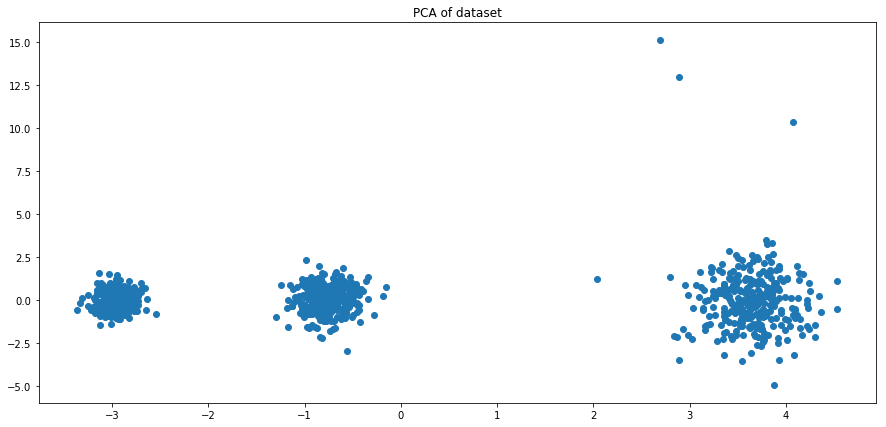

In [65]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing
from sklearn import preprocessing, cluster, metrics

def get_data():
    return pd.read_csv('data8.csv', header=0)

def get_pca_data():
    X = get_data()
    X = preprocessing.scale(X)
    pca = PCA(n_components=2)
    X = pca.fit_transform(X)

    return X

def plot_data():
    X = get_pca_data()
    plt.figure(figsize=(15, 7))
    plt.scatter(X[:,0], X[:,1])
    plt.title('PCA of dataset')
    plt.show()
    
plot_data()

# Outliers por 3 métodos em dados originais
Nesta primeira tentativa de detectar outliers, pegamos os dados originais e aplicamos três métodos diferentes:
<ul>
<li>One-Class SVM: Treina todos os dados como uma classe e depois aplica o classificador em cima dos dados novamente. Aqueles que ficarem de fora da margem são considerados outliers. Esta técnica não deu bons resultados já que acusou uma grande muito grande de outliers (54 outliers) se comparado com a quantidade real (7 outliers). Isso é esperado dado que o One-Class SVM tem melhor performance em dados não-gaussianos.</li>
<li>Robust covariance: Este método espera dados gaussianos e tenta encaixar os dados em elipses. Os resultados aqui parecem bons dado que foram encontrados 8 outliers, número mais próximo dos 7 outliers reais. Houve uma concordância entre os outliers detectados aqui e no método de "Isolation Forest" o que indica também bons resultados.</li>
<li>Isolation Forest: Este método tem melhor performance em dados de alta dimensionalidade e faz uso de random forests para separar os outliers através de uma divisão randômica entre os valores mínimo e máximo de uma feature escolhida ao acaso. Os resultados aqui parecem promissores. Foram encontrados 8 outliers que em sua maioria concordam com aqueles encontrados no método "Robust covariance"</li>
</ul>

O código destes métodos foram extraídos deste <a href="http://scikit-learn.org/stable/auto_examples/covariance/plot_outlier_detection.html#sphx-glr-auto-examples-covariance-plot-outlier-detection-py">link</a>.



In [57]:
print(__doc__)

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
import pandas as pd
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

rng = np.random.RandomState(42)
n_outliers = 7
n_inliers = 900
n_samples = n_outliers + n_inliers
outliers_fraction = n_outliers/n_inliers
# define two outlier detection tools to be compared
classifiers = {
    "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                     kernel="rbf", gamma=0.1),
    "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
    "Isolation Forest": IsolationForest(max_samples=n_samples,
                                        contamination=outliers_fraction,
                                        random_state=rng)}

X = get_data()

# Fit the problem with varying cluster separation
np.random.seed(42)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    # fit the data and tag outliers
    clf.fit(X)
    scores_pred = clf.decision_function(X)
    y_pred = clf.predict(X)
        
    print()
    print(clf_name)
    print("number of outliers:", np.count_nonzero(np.where(y_pred==-1)))
    print("indices of outliers", np.where(y_pred==-1))


Automatically created module for IPython interactive environment

One-Class SVM
number of outliers: 54
indices of outliers (array([  9,  16,  44,  86,  87,  89, 107, 109, 115, 179, 210, 216, 233,
       286, 300, 316, 318, 344, 358, 382, 400, 438, 450, 464, 494, 497,
       531, 556, 563, 565, 578, 583, 596, 597, 598, 630, 631, 682, 686,
       694, 696, 724, 728, 741, 758, 770, 799, 813, 821, 827, 840, 855,
       861, 891]),)

Robust covariance
number of outliers: 8
indices of outliers (array([210, 247, 318, 464, 682, 724, 799, 827]),)

Isolation Forest
number of outliers: 8
indices of outliers (array([210, 318, 464, 682, 724, 799, 821, 827]),)


# Outliers por 3 métodos em dados PCA
A fim de podermos visualizar os pontos considerados outliers, aplicamos o PCA. Nos gráficos a seguir, mostramos as fronteiras geradas pelos 3 algoritmos escolhidos a fim de separar os outliers. Os pontos em preto são considerados inliers. Já os pontos em branco são considerados outliers.

Automatically created module for IPython interactive environment
explained variance ratio (first two components): [ 0.75876863  0.15179952]
sum variance (first two components): 0.910568149902

One-Class SVM
number of outliers: 51
indices of outliers (array([  9,  16,  72,  81,  83, 107, 115, 128, 178, 185, 210, 216, 227,
       232, 233, 264, 286, 290, 300, 318, 344, 363, 376, 378, 382, 400,
       432, 438, 439, 453, 464, 499, 531, 542, 564, 581, 595, 596, 612,
       630, 638, 658, 663, 686, 724, 763, 793, 799, 821, 827, 867]),)


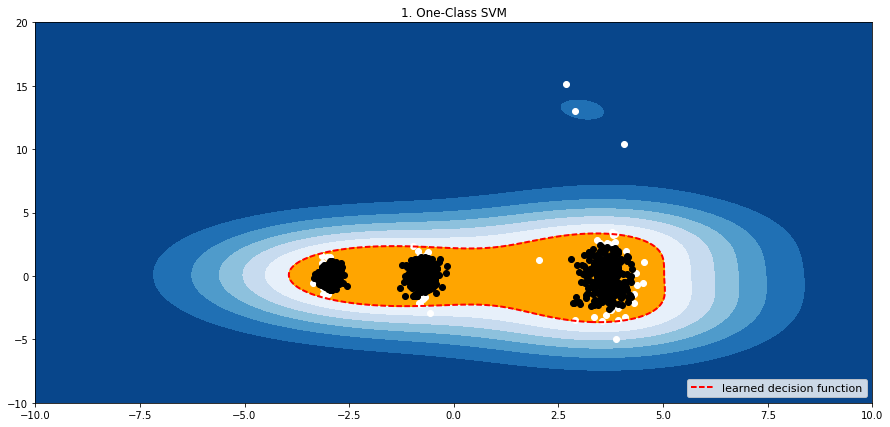


Robust covariance
number of outliers: 8
indices of outliers (array([ 16, 318, 564, 596, 630, 724, 821, 827]),)


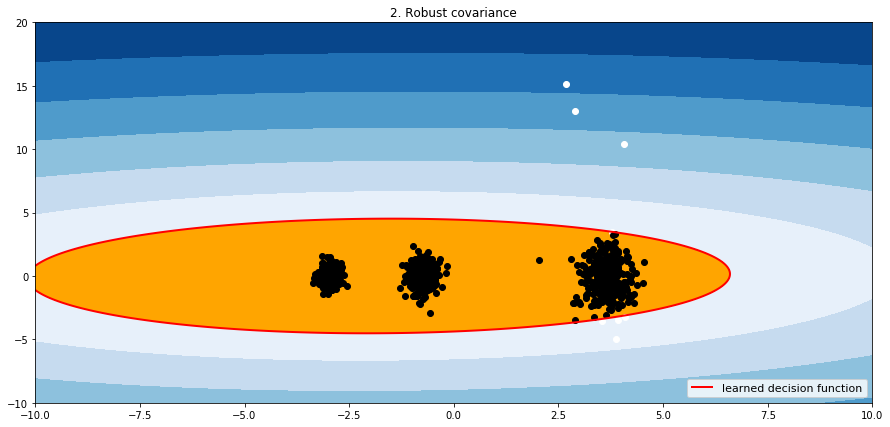


Isolation Forest
number of outliers: 8
indices of outliers (array([210, 318, 400, 595, 724, 799, 821, 827]),)


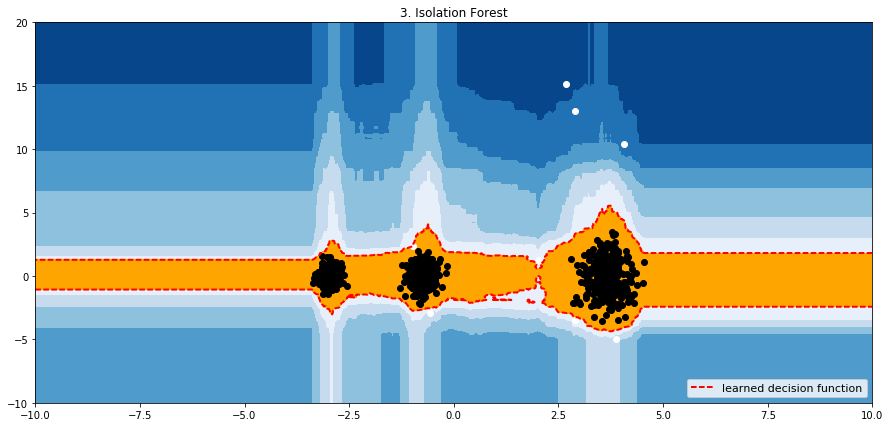

In [58]:
print(__doc__)

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
import pandas as pd
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

rng = np.random.RandomState(42)
n_outliers = 7
n_inliers = 900
n_samples = n_outliers + n_inliers
outliers_fraction = n_outliers/n_inliers
# define two outlier detection tools to be compared
classifiers = {
    "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                     kernel="rbf", gamma=0.1),
    "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
    "Isolation Forest": IsolationForest(max_samples=n_samples,
                                        contamination=outliers_fraction,
                                        random_state=rng)}

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-10, 10, 500), np.linspace(-10, 20, 500))

X = get_pca_data()

# Fit the problem with varying cluster separation
np.random.seed(42)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    # fit the data and tag outliers
    clf.fit(X)
    scores_pred = clf.decision_function(X)
    threshold = stats.scoreatpercentile(scores_pred,
                                        100 * outliers_fraction)
    y_pred = clf.predict(X)
    
    # plot the levels lines and the points
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(15, 7))
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                     cmap=plt.cm.Blues_r)
    a = plt.contour(xx, yy, Z, levels=[threshold],
                        linewidths=2, colors='red')
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                     colors='orange')
    
    b = plt.scatter(X[y_pred==-1, 0], X[y_pred==-1, 1], c='white')
    c = plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c='black')
    
    plt.axis('tight')
    plt.legend(
        [a.collections[0], b, c],
        ['learned decision function'],
        prop=matplotlib.font_manager.FontProperties(size=11),
        loc='lower right')
    plt.title("%d. %s" % (i + 1, clf_name))
    
    print()
    print(clf_name)
    print("number of outliers:", np.count_nonzero(np.where(y_pred==-1)))
    print("indices of outliers", np.where(y_pred==-1))

    plt.show()

# Outliers por densidade
Usamos aqui o DBScan para clusterizar os dados e também obter os outliers. O algoritmo do DBScan já nos retorna os outliers encontrados. Foram encontrados 6 outliers e pelo menos 5 deles concordam com os métodos testados anteriormente. Os índices 318, 724, 799, 821, 827 já apareceram como outliers em praticamente todos os métodos.
Note que aqui, plotamos o gráfico de distâncias 5-NN para encontrar o valor de epsilon ideal (hiper-parâmetro do DBScan)

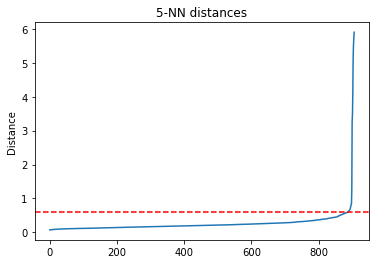

---------- DBScan with original data ----------
number of outliers: 8
indices of outliers (array([210, 318, 464, 682, 724, 799, 821, 827]),)


/Users/tanakaed/anaconda3/envs/condaenv/lib/python3.6/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


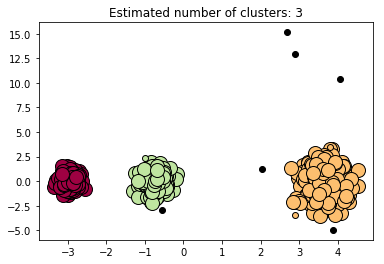

---------- DBScan with PCA data ----------
number of outliers: 6
indices of outliers (array([318, 400, 724, 799, 821, 827]),)


In [66]:
def plot_distances_5nn():
    import numpy as np
    from sklearn.neighbors import NearestNeighbors
    X = pd.read_csv('data8.csv', header=0)
    
    # we use 6 here because it also includes each point itself in the distances
    neigh = NearestNeighbors(n_neighbors=6) 
    neigh.fit(X)
    dist, ind = neigh.kneighbors(X, return_distance=True)    
    plt.plot(np.sort(np.array(dist[:,-1]).flatten()))
    plt.title('5-NN distances')
    plt.ylabel('Distance')
    plt.axhline(y=0.6, color='r', linestyle='--')
    plt.show()
    
    
def dbscan_outliers():
    X = get_data()
    db = cluster.DBSCAN(eps=0.75, min_samples=5).fit(X)
    labels = db.labels_
    print("---------- DBScan with original data ----------")
    print("number of outliers:", np.count_nonzero(np.where(labels==-1)))
    print("indices of outliers", np.where(labels==-1))
    
    
def dbscan_outliers_pca():
    X = get_pca_data()
    db = cluster.DBSCAN(eps=0.75, min_samples=5).fit(X)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
    print("---------- DBScan with PCA data ----------")
    print("number of outliers:", np.count_nonzero(np.where(labels==-1)))
    print("indices of outliers", np.where(labels==-1))

plot_distances_5nn()
dbscan_outliers()
dbscan_outliers_pca()

# Conclusões
Como sabemos que os dados são normais, podemos confiar mais no método de covariância robusta que tenta encaixar os dados em formas elípticas. Excluindo o método de One-Class SVM que não deu bons resultados, notamos que os índices considerados como outliers foram:


| Algorithm + Data | Outliers Detected   |
|------|------|
| (covariance + original data) | 210, 247, 318, 464, 682, 724, 799, 827 |
| (isolation forest + original data)| 210, 318, 464, 682, 724, 799, 821, 827 |
| (covariance + PCA) | 16, 318, 564, 596, 630, 724, 821, 827  |
| (isolation forest + PCA) | 210, 318, 400, 595, 724, 799, 821, 827 |
| (dbscan + PCA) | 318, 400, 724, 799, 821, 827 |
| (dbscan + original data) | 210, 318, 464, 682, 724, 799, 821, 827 |

Observando a repetição de alguns índices, podemos considerar com alto grau de certeza que os seguintes pontos são outliers:


| Outliers |
|------|
| 210 |
| 318 |
| 724 |
| 799 |
| 821 |
| 827 |
| 682 (menor grau de certeza - aparece 3 vezes nas análises) |